In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mssa import MSSA
import pandas as pd

%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
gaussian = lambda x : np.exp(-0.5 * x**2)
rectangular = lambda x : 1 * (x < 1 + 1e-6)
epanechnikov = lambda x : np.maximum(1 - x**2, 0)
epanechnikov_like = lambda x : (1 - 0.5 * x**2) * (x <=1 )

In [4]:
# Create a multiclass dataset
data_train = pd.read_table('data/pendigits_train.txt', sep=',', header=None)
data_test = pd.read_table('data/pendigits_test.txt', sep=',', header=None)
data_test = data_test.sample(frac=1)

X_train = data_train.iloc[:, :-1]
X_train = np.array(X_train)
X_test = data_test.iloc[:, :-1]
X_test = np.array(X_test)

y_train = data_train.iloc[:, -1]
y_train = np.array(y_train)
y_test = data_test.iloc[:, -1]
y_test = np.array(y_test)

sample_size = X_test.shape[0]
# Define the number of classes
classes = np.unique(y_test)
n_classes = classes.shape[0]

print('Features shape:', X_train.shape, X_test.shape)
print('Labels shape:', y_train.shape, y_test.shape, ',', n_classes, 'different classes')

Features shape: (7494, 16) (3498, 16)
Labels shape: (7494,) (3498,) , 10 different classes


In [5]:
n_neighbors = np.array([1.9 * 1.25**i for i in range(10)]).astype(int)
print(n_neighbors)

[ 1  2  2  3  4  5  7  9 11 14]


In [6]:
mssa = MSSA(n_neighbors=n_neighbors, loc_kernel=rectangular)

#for delta in np.arange(0.6, 0.96, 0.05):
for delta in [0.75]:

    # tune critical values
    z = mssa.tune_critical_values(X_train, X_test[0, :].reshape(-1), n_classes, confidence=delta)
    #print(z)

    #for c in np.arange(0.1, 0.6, 0.1):
    #for c in np.arange(0.8, 1.5, 0.1):
    for c in [0.3]:
        mssa_err = 0
        knn_err = np.zeros(n_neighbors.shape)
        for i in range(sample_size):

            y_mssa, y_knn = mssa.predict(X_train, y_train, X_test[i, :].reshape(-1), c * z)
            
            mssa_err += 1./sample_size * (y_test[i] != y_mssa)
            knn_err += 1./sample_size * (y_test[i] != y_knn)

        print('delta = ', delta, ', c = ', c, ', err = ', mssa_err)
print(np.min(knn_err))

delta =  0.75 , c =  0.3 , err =  0.0220125786164
0.0220125786164


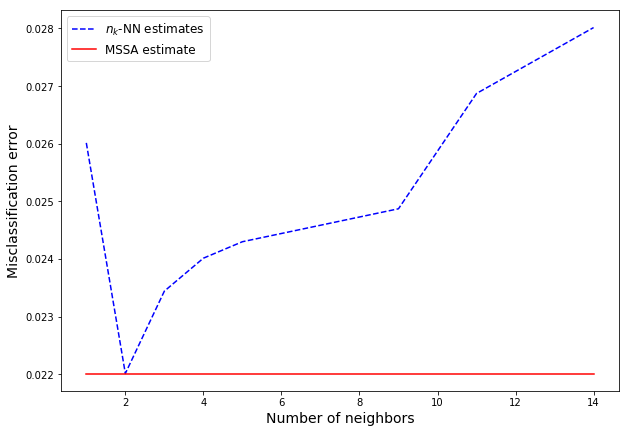

In [7]:
plt.figure(figsize=(10,7))
plt.plot(n_neighbors, knn_err, 'b--', label='$n_k$-NN estimates')
plt.plot(n_neighbors, mssa_err * np.ones(n_neighbors.shape[0]), 'r-', label='MSSA estimate')
#plt.plot(np.arange(n_neighbors.shape[0]), knn_err, 'b--', label='$n_k$-NN estimates')
#plt.plot(np.arange(n_neighbors.shape[0]), mssa_err * np.ones(n_neighbors.shape[0]), 'r-', label='MSSA estimate')
plt.ylabel('Misclassification error', fontsize=14)
plt.xlabel('Number of neighbors', fontsize=14)
#plt.xlabel('Index of the weighted nearest neighbor estimate', fontsize=14)
plt.legend(loc=0, fontsize=12)
plt.show()